# <u>Sorting Arrays</u>

In [1]:
L = [3,1,4,1,5,9,2,6] 
sorted(L) # returns a sorted copy

[1, 1, 2, 3, 4, 5, 6, 9]

In [2]:
# By contrast, the sort method of lists will sort the list in-place

L.sort() # acts in-place and returns None 
print(L)

[1, 1, 2, 3, 4, 5, 6, 9]


In [3]:
sorted('python')

['h', 'n', 'o', 'p', 't', 'y']

## Fast Sorting in NumPy: np.sort and np.argsort

In [4]:
import numpy as np

In [5]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [6]:
# Similarly to the sort method of Python lists, you can also sort an array in-place using the array sort method

x.sort()
x

array([1, 2, 3, 4, 5])

In [7]:
# A related function is argsort, which instead returns the indices of the sorted elements

x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
i

array([1, 0, 3, 2, 4])

In [8]:
x[i]

array([1, 2, 3, 4, 5])

## Sorting Along Rows or Columns

In [9]:
rng = np.random.default_rng(seed=42)
X = rng.integers(0, 10, (4, 6))
print(X)

[[0 7 6 4 4 8]
 [0 6 2 0 5 9]
 [7 7 7 7 5 1]
 [8 4 5 3 1 9]]


In [10]:
# sort each column of X 
np.sort(X, axis=0)

array([[0, 4, 2, 0, 1, 1],
       [0, 6, 5, 3, 4, 8],
       [7, 7, 6, 4, 5, 9],
       [8, 7, 7, 7, 5, 9]])

In [11]:
# sort each row of X 
np.sort(X, axis=1)

array([[0, 4, 4, 6, 7, 8],
       [0, 0, 2, 5, 6, 9],
       [1, 5, 7, 7, 7, 7],
       [1, 3, 4, 5, 8, 9]])

In [12]:
X

array([[0, 7, 6, 4, 4, 8],
       [0, 6, 2, 0, 5, 9],
       [7, 7, 7, 7, 5, 1],
       [8, 4, 5, 3, 1, 9]])

## Partial Sorts: Partitioning

In [13]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

In [14]:
X

array([[0, 7, 6, 4, 4, 8],
       [0, 6, 2, 0, 5, 9],
       [7, 7, 7, 7, 5, 1],
       [8, 4, 5, 3, 1, 9]])

In [15]:
np.partition(X, 2, axis=1)

# The result is an array where the first two slots in each row contain the smallest values from that row, 
# with the remaining values filling the remaining slots.

array([[0, 4, 4, 7, 6, 8],
       [0, 0, 2, 6, 5, 9],
       [1, 5, 7, 7, 7, 7],
       [1, 3, 4, 5, 8, 9]])

In [16]:
# there is an np.argpartition function that computes indices of the partition. 
indices = np.argpartition(X, 3, axis=1)

## Example: k-Nearest Neighbors

In [17]:
X = rng.random((10, 2))

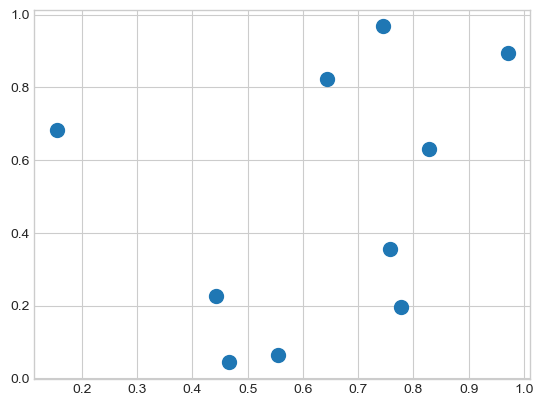

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.scatter(X[:, 0], X[:, 1], s=100);

In [19]:
dist_seq = np.sum((X[:, np.newaxis] - X[np.newaxis, :]) ** 2, axis=-1 )

In [20]:
dist_seq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [21]:
dist_seq

array([[0.        , 0.39482809, 0.58396752, 0.07028811, 0.23229143,
        0.11177021, 0.41263358, 0.63815537, 0.25920392, 0.03113223],
       [0.39482809, 0.        , 0.03906548, 0.31118281, 0.11522148,
        0.7214276 , 0.11326719, 0.03419159, 0.29135606, 0.63881176],
       [0.58396752, 0.03906548, 0.        , 0.39700471, 0.12592501,
        0.86089513, 0.06720011, 0.00812058, 0.54368422, 0.85282752],
       [0.07028811, 0.31118281, 0.39700471, 0.        , 0.081642  ,
        0.08882774, 0.19341679, 0.47583627, 0.45602939, 0.11965936],
       [0.23229143, 0.11522148, 0.12592501, 0.081642  , 0.        ,
        0.33528787, 0.02597585, 0.18144286, 0.47249968, 0.37592667],
       [0.11177021, 0.7214276 , 0.86089513, 0.08882774, 0.33528787,
        0.        , 0.52486256, 0.97533281, 0.71065321, 0.05658068],
       [0.41263358, 0.11326719, 0.06720011, 0.19341679, 0.02597585,
        0.52486256, 0.        , 0.11988469, 0.62803789, 0.59846002],
       [0.63815537, 0.03419159, 0.0081205

In [22]:
nearest = np.argsort(dist_seq, axis=1)
print(nearest)

[[0 9 3 5 4 8 1 6 2 7]
 [1 7 2 6 4 8 3 0 9 5]
 [2 7 1 6 4 3 8 0 9 5]
 [3 0 4 5 9 6 1 2 8 7]
 [4 6 3 1 2 7 0 5 9 8]
 [5 9 3 0 4 6 8 1 2 7]
 [6 4 2 1 7 3 0 5 9 8]
 [7 2 1 6 4 3 8 0 9 5]
 [8 0 1 9 3 4 7 2 6 5]
 [9 0 5 3 4 8 6 1 2 7]]


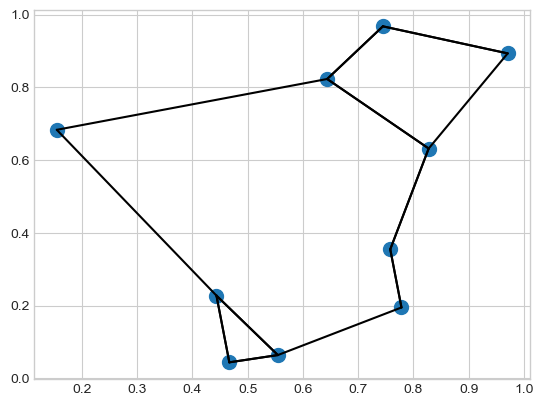

In [23]:
plt.scatter(X[:, 0], X[:, 1], s=100)
# draw lines from each point to its two nearest neighbors
K=2
for i in range(X.shape[0]):
    for j in nearest[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen: 
        plt.plot(*zip(X[j], X[i]), color='black')